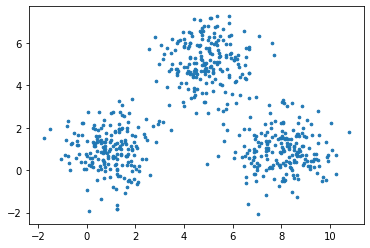

In [6]:
#random data generator
import numpy as np
import matplotlib.pyplot as plt
from random import randint

center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

In [136]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

#k means starting
cent1 = np.random.randn(1,2)
cent2 = np.random.randn(1,2)
cent3 = np.random.randn(1,2)

cluster_dict = {}

cluster_dict[cent1[0][0],cent1[0][1]]=[]
cluster_dict[cent2[0][0],cent2[0][1]]=[]
cluster_dict[cent3[0][0],cent3[0][1]]=[]

for j in range(20):
    for point in data:
        res = []
        for centers in cluster_dict:

            cx = centers[0]
            cy = centers[1]
            temp=[centers,distance(cx,cy,point[0],point[1])]
            res.append(temp)
        min_value = min(res, key = lambda t: t[1])
        temp = []
        temp.append(point[0])
        temp.append(point[1])
        cluster_dict[min_value[0]].append(temp)

    new_centers = []
    old_centers = []

    for center in cluster_dict:
        x_total = 0
        y_total = 0
        for point in cluster_dict[center]:
            x_total+=point[0]
            y_total+=point[1]
        mean_x = (x_total+center[0])/(len(cluster_dict[center])+1)
        mean_y = (y_total+center[1])/(len(cluster_dict[center])+1)
       
        temp = []
        temp.append(mean_x)
        temp.append(mean_y)
        new_centers.append(temp)
    
    for center in cluster_dict:
        old_centers.append(center)
    
    if j!=19:
        cluster_dict ={}
        for center in new_centers:
            cluster_dict[center[0],center[1]] = [] 
        print(cluster_dict)
print(cluster_dict)

             
    


{(1.954211078402354, 2.66362826397505): [], (6.211592505538266, 2.235574371942159): [], (-0.3213434988359158, 1.4138539856563912): []}
{(2.6876619222377953, 3.1900822405775244): [], (6.908419410577392, 2.666718382352354): [], (0.5550675364684899, 0.6459581400620289): []}
{(3.9295885910165858, 4.705653193353081): [], (7.400646108407268, 2.100257219239374): [], (0.8196747823040573, 0.7624024851147864): []}
{(4.773953884502005, 5.142322409871762): [], (7.9379892847339315, 1.1129007081039102): [], (0.924362611297765, 0.910231148151443): []}
{(4.929178636187117, 5.111312019298382): [], (8.048236236938186, 0.9148839608545745): [], (0.963499040713625, 0.9416493752638466): []}
{(4.940101716297406, 5.1029841824053195): [], (8.05415161107984, 0.9011946077164606): [], (0.963693749317684, 0.9418056848514704): []}
{(4.940156059979547, 5.102942750380975): [], (8.054181040801936, 0.9011265014819426): [], (0.9636947180172067, 0.9418064625111103): []}
{(4.940156330346125, 5.102942544251501): [], (8.054

cluster (4.940156331697958, 5.102942543220854)
cluster (8.054181187950547, 0.90112616095077)
cluster (0.9636947228607043, 0.9418064663994087)


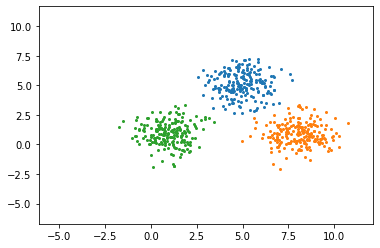

In [167]:
def plot_clusters(min_x, min_y, max_x, max_y, cluster_dict):

    plot_size = 3.5
    plt.xlim(min_x*plot_size, max_x*plot_size)
    plt.ylim(min_y*plot_size, max_y*plot_size)

    color = []
    
    for center in cluster_dict:
        name = "cluster "+str(center)
        color.append(name)
    
    
    counter = 0
    for center in cluster_dict:
        x_arr = []
        y_arr = []
        for point in cluster_dict[center]:
            x_arr.append(point[0])
            y_arr.append(point[1])
        plt.scatter(x_arr, y_arr, s=4, label=color[counter])
        print(color[counter])
        counter+=1

for center in cluster_dict:
    min_value_x = min(cluster_dict[center], key = lambda t: t[0])[0]
    max_value_x = max(cluster_dict[center], key = lambda t: t[0])[0]
    min_value_y = min(cluster_dict[center], key = lambda t: t[1])[1]
    max_value_y = max(cluster_dict[center], key = lambda t: t[1])[1]
    
plot_clusters(min_value_x, min_value_y, max_value_x, max_value_y,cluster_dict)